# Testing: &thinsp; calculation from functions

In [3]:
import xarray as xr

import numpy as np
import scipy

import matplotlib.pyplot as plt
import cartopy

import os
import timeit
import time

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
def save_file(dataset, folder, fileName):
    os.makedirs(folder, exist_ok=True)
    path = folder + '/' + fileName

    if os.path.exists(path):
        os.remove(path)    
    
    dataset.to_netcdf(path)

In [5]:
def plot_scene(scene, cmap='Reds', title='', vmin=None, vmax=None,fig_width=20 ,fig_height=10):
    projection = cartopy.crs.PlateCarree(central_longitude=180)
    lat = scene.lat
    lon = scene.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(fig_width, fig_height))
    scene.plot(transform=cartopy.crs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())
    ax.set_title(title)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [6]:
def plot_timeseries(y, variable_name='', series_type ='', title='', xmin = None, ymin = None):
    plt.figure(figsize=(25,5))
    plt.plot(y)
    plt.axhline(y=y.mean(dim='time'), color='k')
    plt.title(title)
    plt.ylabel(variable_name)
    plt.xlabel(series_type)
    plt.ylim([xmin,ymin])

In [7]:
models = [
        # 'IPSL-CM5A-MR', # 1
        'GFDL-CM3',     # 2
        # 'GISS-E2-H',    # 3
        # 'bcc-csm1-1',   # 4
        # 'CNRM-CM5',     # 5
        # 'CCSM4',        # 6
        # 'HadGEM2-AO',   # 7
        # 'BNU-ESM',      # 8
        # 'EC-EARTH',     # 9
        # 'FGOALS-g2',    # 10
        # 'MPI-ESM-MR',   # 11
        # 'CMCC-CM',      # 12
        # 'inmcm4',       # 13
        # 'NorESM1-M',    # 14
        # 'CanESM2',      # 15 
        # 'MIROC5',       # 16
        # 'HadGEM2-CC',   # 17
        # 'MRI-CGCM3',    # 18
        # 'CESM1-BGC'     # 19
        ]
model = models[0]

experiments = [
        'historical',
        # 'rcp85'
        ]
experiment=experiments[0]


variables = [
        # 'precip',
        # 'tas',
        # 'pw',
        # 'hur',
        # 'cl',
        # 'wap500'
        ]

In [9]:
precip = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_precip_' + experiment + '.nc')['precip']
# tas = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_tas_' + experiment + '.nc')['tas']
# pw = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_pw_' + experiment + '.nc')['pw']
# hur = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_hur_' + experiment + '.nc')['hur']
# cloud_low = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_clMax_' + experiment + '.nc')['cloud_low']
# cloud_high = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_clMax_' + experiment + '.nc')['cloud_high']
# wap500 = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_wap500_' + experiment + '.nc')['wap500']

In [33]:
from prFuncs import *

In [38]:
ds_rxday = calc_rxday(precip)
ds_rxday

<xarray.Dataset>
Dimensions:  (time: 30, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-12-31 00:00:00 ... 1999-12-31 00:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    rx1day   (time, lat, lon) float32 9.972 13.62 9.293 ... 8.492 3.344 5.649
    rx5day   (time, lat, lon) float32 4.349 4.201 3.037 ... 2.593 1.927 3.121

In [39]:
ds_prPercentiles = calc_pr_percentiles(precip)
ds_prPercentiles

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    pr95     (time) float64 14.08 13.81 14.17 14.02 ... 16.82 16.76 16.91 15.32
    pr97     (time) float64 17.44 17.1 17.44 17.31 ... 20.42 21.26 21.76 19.81
    pr99     (time) float64 25.16 28.12 26.33 25.34 ... 25.66 29.67 33.37 31.73
    pr999    (time) float64 46.43 56.0 75.17 68.38 ... 41.02 47.47 67.33 72.96

In [37]:
ds_F_pr10 = F_pr10(precip)
ds_F_pr10

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    F_pr10   (time) int64 298 273 268 277 317 340 ... 360 346 383 322 325 297
Attributes:
    description:  Number of gridboxes in daily scene exceeding 10 mm/day

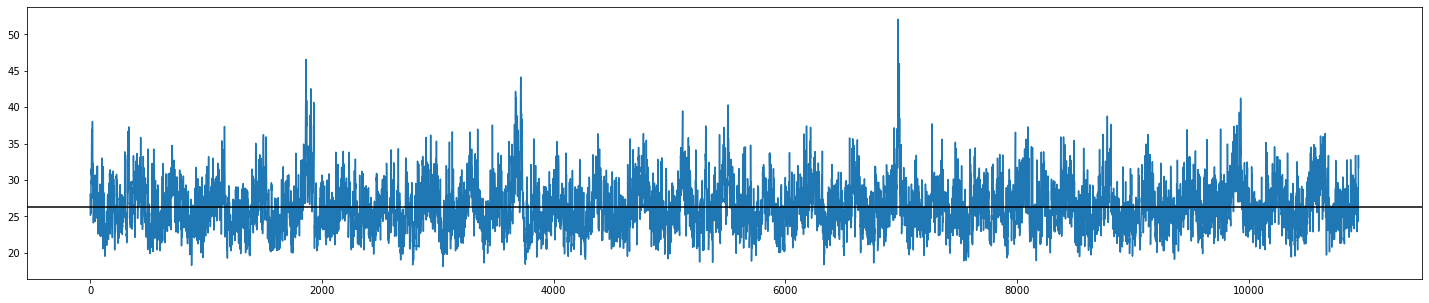

In [46]:
# plot_scene(ds_rxday.rx1day.mean(dim='time'))
# plot_scene(ds_rxday.rx1day.isel(time=0))
# plot_timeseries(ds_prPercentiles.pr99)